## Strong Scaling Test with wall-clock time

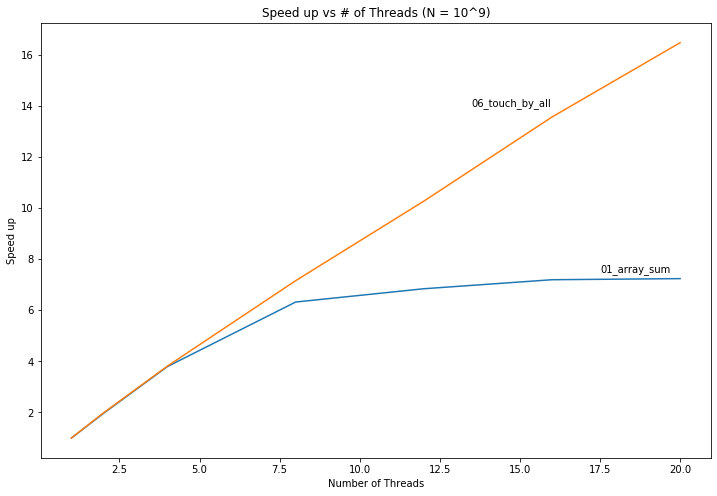

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (wall-clock time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed up")

plt.text(17.5,7.5,'01_array_sum',fontsize = 10)
plt.text(13.5,14,'06_touch_by_all',fontsize = 10)
output_files = [i for i in os.listdir() if i.endswith(".txt")]

for j in output_files:
    
    f = open(j, "r")
    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))
    plt.plot(number_of_processors,liste[0] / np.array(liste))

## Strong Scaling Test with elapsed time

1 threads run has elapsed time:  6.93
2 threads run has elapsed time:  5.7
4 threads run has elapsed time:  5.11
8 threads run has elapsed time:  4.88
12 threads run has elapsed time:  4.85
16 threads run has elapsed time:  4.79
20 threads run has elapsed time:  4.79


[1, 2, 4, 8, 12, 16, 20] [1.         1.21578947 1.35616438 1.42008197 1.42886598 1.44676409
 1.44676409]
1 threads run has elapsed time:  5.87
2 threads run has elapsed time:  2.98
4 threads run has elapsed time:  1.55
8 threads run has elapsed time:  0.84
12 threads run has elapsed time:  0.59
16 threads run has elapsed time:  0.5
20 threads run has elapsed time:  0.47


[1, 2, 4, 8, 12, 16, 20] [ 1.          1.96979866  3.78709677  6.98809524  9.94915254 11.74
 12.4893617 ]


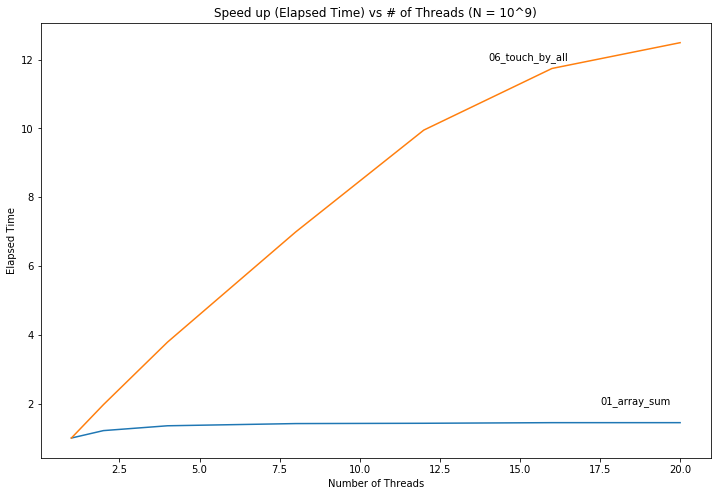

In [128]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Elapsed Time")

plt.text(17.5,2,'01_array_sum',fontsize = 10)
plt.text(14,12,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i.endswith(".txt")]

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    print("\n")
    #print(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
    plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))


## Measure the overhead

Overhead function $T_o = p \times T_p-T_S$ [reference (page 2)](https://www8.cs.umu.se/kurser/5DV050/VT11/F1b.pdf)

Overhead for 01_array_sum_output.txt [0.       0.0489   0.134048 0.669992 1.901656 3.086464 4.44624 ]
Overhead for 06_touch_by_all_output.txt [0.       0.02146  0.121196 0.297996 0.425876 0.454476 0.54136 ]


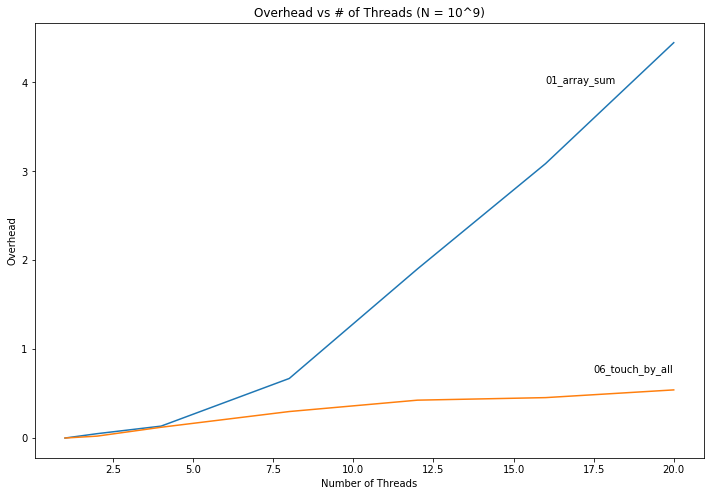

In [120]:
import os
import numpy as np

plt.figure(figsize = (12,8))
plt.title("Overhead vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead")

plt.text(16,4,'01_array_sum',fontsize = 10)
plt.text(17.5,0.75,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i.endswith(".txt")]

number_of_processors = [1,2,4,8,12,16,20]

for j in output_files:
    
    f = open(j, "r")

    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))

    Ts = liste[0]
    Tp = np.array(liste)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead for",f.name,To)    

    plt.plot(p,To)

Overhead for 01_array_sum_output.txt [ 0.    4.47 13.51 32.11 51.27 69.71 88.87]
Overhead for 06_touch_by_all_output.txt [0.   0.09 0.33 0.85 1.21 2.13 3.53]


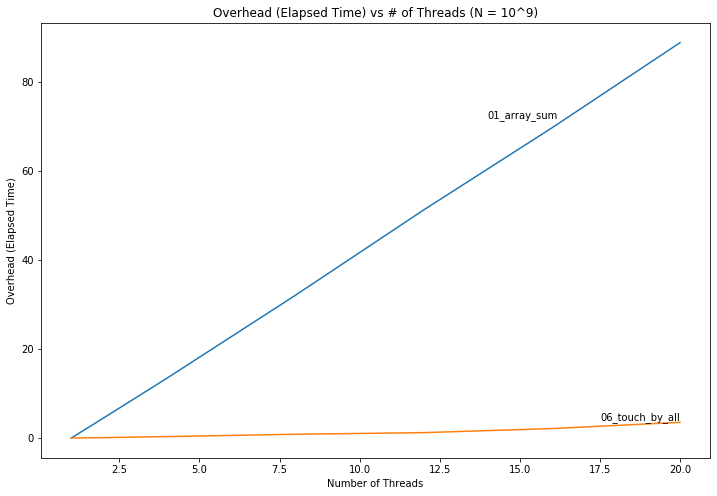

In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Overhead (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead (Elapsed Time)")

plt.text(14,72,'01_array_sum',fontsize = 10)
plt.text(17.5,4,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i.endswith(".txt")]

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    
    Ts = elapsed_list[0]
    Tp = np.array(elapsed_list)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead for",f.name, To)
    plt.plot(p,To)


As it can be understood from above plots, touch_by_all method is more efficient than touch_first method. In other words touch by all method scale better with increasing number of computation units unlike touch_first method which is not scaling at all. Also, in terms of overhead with the increasing number of computation units for touch_first method increase so this situaiton shows us touch_by_all method is more efficient than touch_first method. In order to understand this difference, deeper analyze must be performed. According to this context these codes will be profilied by using perf.